In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [2]:
# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 6

In [3]:
# Data generators with augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/train', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True)
validation_generator = test_datagen.flow_from_directory('data/validation', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)
test_generator = test_datagen.flow_from_directory('data/test', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

Found 13412 images belonging to 6 classes.
Found 2549 images belonging to 6 classes.
Found 1845 images belonging to 6 classes.


In [19]:
# Get the class names from the data generator
class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)

Class Names: ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirells']


In [4]:
# Load pre-trained model (VGG16 in this case)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [5]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Build model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

In [7]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train model
history = model.fit(train_generator, epochs=1, validation_data=validation_generator)

420/420 [==============================] - ETA: 0s - loss: 0.7836 - accuracy: 0.7414

KeyboardInterrupt: 

In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

58/58 [==============================] - 216s 4s/step - loss: 0.4148 - accuracy: 0.8699
Test Accuracy: 0.869918704032898


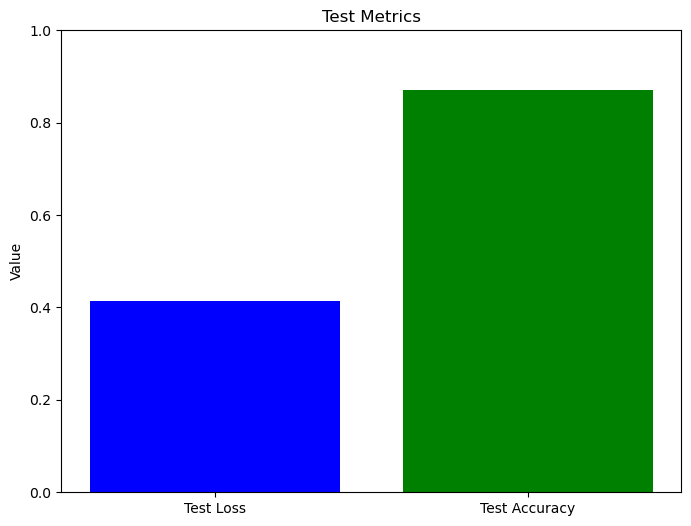

In [53]:
# Test metrics
metrics = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_acc]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green'])
plt.title('Test Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()

In [12]:
model.save('animal_classification_model.h5')

C:\Users\Hemteja\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [13]:
# Load the trained model
model = tf.keras.models.load_model('animal_classification_model.h5')

In [47]:
# Load and preprocess the new image
img_path = 'images/eleph.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize pixel values

In [48]:
# Make prediction
prediction = model.predict(img_array)

1/1 [==============================] - 0s 262ms/step


In [49]:
# Get the class label with the highest probability
predicted_class = np.argmax(prediction)

In [50]:
# Print the predicted class
print("Predicted Class:", class_names[predicted_class])

Predicted Class: horses
